# **USTACKY PROJECT 1**

# XYZ SUPERMARKET SALES ANALYSIS

## **LOADING THE DATASET:**

### Using glob to match the pattern "csv", combining all files and exporting to a csv:

In [31]:
# Importing Libraries:
import os
import glob
import pandas as pd
joined_files = os.path.join("C:/Users/PROSPERITY/Downloads/Pandas-Analytics-Project-main", "*.csv") 
joined_list = glob.glob(joined_files)
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

### Reading the csv file to a pandas dataframe:

In [32]:
df.to_csv("XYZ_sales")

## **DATA EXPLORATION:**

In [33]:
# Importing Libraries:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

### Viewing the first five rows of the dataset:

In [34]:
# Checking the first five rows of the dataset:
df1 = pd.read_csv("XYZ_sales")
print(df1.head())

   Unnamed: 0   Invoice ID Branch   City Customer type  Gender  \
0           0  692-92-5582      B  Abuja        Member  Female   
1           1  351-62-0822      B  Abuja        Member  Female   
2           2  529-56-3974      B  Abuja        Member    Male   
3           3  299-46-1805      B  Abuja        Member  Female   
4           4  319-50-3348      B  Abuja        Normal  Female   

             Product line  Unit price  Quantity    Tax 5%      Total  \
0      Food and beverages     19742.4         3   2961.36   62188.56   
1     Fashion accessories      5212.8         4   1042.56   21893.76   
2  Electronic accessories      9183.6         4   1836.72   38571.12   
3       Sports and travel     33739.2         6  10121.76  212556.96   
4      Home and lifestyle     14508.0         2   1450.80   30466.80   

        Date   Time Payment      cogs  gross margin percentage  gross income  \
0  2/20/2019  13:27    Card   59227.2                 4.761905       2961.36   
1   2/6/20

### Checking the number of rows and columns present in the data set:

In [35]:
# Checking the number of rows and columns present in the dataset:
print(df1.shape)

(1000, 18)


### Generating the names of the columns in the data set:

In [36]:
# Generating the names of the columns present in the dataste:
print(df1.columns)

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


### Statistical summary of the data set:

In [37]:
# Dropping the Unnamed column:
df1.drop("Unnamed: 0", inplace=True, axis=1)
# Statisticsl Summary of the dataset:
print(df1.describe())

         Unit price     Quantity        Tax 5%          Total           cogs  \
count   1000.000000  1000.000000   1000.000000    1000.000000    1000.000000   
mean   20041.966800     5.510000   5536.572840  116268.029640  110731.456800   
std     9538.066205     2.923431   4215.177173   88518.720636   84303.543463   
min     3628.800000     1.000000    183.060000    3844.260000    3661.200000   
25%    11835.000000     3.000000   2132.955000   44792.055000   42659.100000   
50%    19882.800000     5.000000   4351.680000   91385.280000   87033.600000   
75%    28056.600000     8.000000   8080.290000  169686.090000  161605.800000   
max    35985.600000    10.000000  17874.000000  375354.000000  357480.000000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00   5536.572840     6.97270  
std               6.220360e-14   4215.177173     1.71858  
min               4.761905e+00    183.06000

### Question 1: Give insights obtained from the statistical summary of the data set:
**From the summary statistics, it can be observed that:**
<br>1) The goods with higher prices appear to have been purchased more by customers. This is indicated by the mean unit price being 20,041.96, as compared to the highest unit price which is  35,985.60.
<br>2) The mean rating given by customers is above average (6.97), but there is room for improvement.
<br>3) The count for each of the columns represented is equal to the number of rows in the dataset, indicating that there isn't likely to be any missing values.
<br>4) The gross margin percentage is not high, and is the same for all products.

### Checking for missing values:

In [38]:
# Checking for missing values in the dataset:
print(df1.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


### Printing the data set information

In [39]:
# Getting a general overview of the dataset:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Working with the DateTime features (Converting the Date and Time columns to the datetime data type):

In [40]:
# Importing the datetime library
import datetime as dt
# Converting the date and time columns to datetime data type:
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Time"] = pd.to_datetime(df1["Time"])
print(df1["Date"].dtype)
print(df1["Time"].dtype)

datetime64[ns]
datetime64[ns]


### Extracting features from the Date and Time columns:

In [41]:
# Extracting the day, month, year, and hour values to pfrm new columns:
df1["Day"] = df1["Date"].dt.day
df1["Month"] = df1["Date"].dt.month
df1["Year"] = df1["Date"].dt.year
df1["Hour"] = df1["Time"].dt.hour

### Creating a day-of-week column:

In [42]:
df1["Day_of_week"] = df1["Date"].dt.day_name()
print(df1.head())

    Invoice ID Branch   City Customer type  Gender            Product line  \
0  692-92-5582      B  Abuja        Member  Female      Food and beverages   
1  351-62-0822      B  Abuja        Member  Female     Fashion accessories   
2  529-56-3974      B  Abuja        Member    Male  Electronic accessories   
3  299-46-1805      B  Abuja        Member  Female       Sports and travel   
4  319-50-3348      B  Abuja        Normal  Female      Home and lifestyle   

   Unit price  Quantity    Tax 5%      Total  ... Payment      cogs  \
0     19742.4         3   2961.36   62188.56  ...    Card   59227.2   
1      5212.8         4   1042.56   21893.76  ...    Epay   20851.2   
2      9183.6         4   1836.72   38571.12  ...    Cash   36734.4   
3     33739.2         6  10121.76  212556.96  ...    Cash  202435.2   
4     14508.0         2   1450.80   30466.80  ...    Epay   29016.0   

  gross margin percentage  gross income  Rating  Day  Month  Year  Hour  \
0                4.761905    

### Getting the number of unique hours from the Hour column:

In [43]:
print(df1["Hour"].nunique())
unique_hours = df1["Hour"].unique()
print(unique_hours)

11
[13 18 17 16 15 10 12 19 14 11 20]


### Selecting all the categorical columns in the dataset:

In [46]:
categorical_columns = [column for column in df1.columns if df1[column].dtype== "object"]
print(categorical_columns)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Day_of_week']


### Generating the number of unique values for each categorical column:

In [50]:
for i in categorical_columns:
    n_unique = df1[i].unique().tolist()
    print("Total Number of unique values in the Column ",i,": {}". format(len(n_unique)))

Total Number of unique values in the Column  Invoice ID : 1000
Total Number of unique values in the Column  Branch : 3
Total Number of unique values in the Column  City : 3
Total Number of unique values in the Column  Customer type : 2
Total Number of unique values in the Column  Gender : 2
Total Number of unique values in the Column  Product line : 6
Total Number of unique values in the Column  Payment : 3
Total Number of unique values in the Column  Day_of_week : 7


### Generating the value count for each categorical column:

In [51]:
for i in categorical_columns[1:]:
    print("Value count for ", i, "column:\n{}". format(df1[i].value_counts()),"\n")

Value count for  Branch column:
A    340
B    332
C    328
Name: Branch, dtype: int64 

Value count for  City column:
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64 

Value count for  Customer type column:
Member    501
Normal    499
Name: Customer type, dtype: int64 

Value count for  Gender column:
Female    501
Male      499
Name: Gender, dtype: int64 

Value count for  Product line column:
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 

Value count for  Payment column:
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64 

Value count for  Day_of_week column:
Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: Day_of_week, dtype: int64 



### **AGGREGATION WITH GROUPBY AND PIVOT TABLES:**

### Question 1: Determine the city with the highest total gross income

In [52]:
df1.groupby("City")["gross income"].agg([min, max, sum])

,min,max,sum
City,,,
Abuja,319.50,17528.4,1820531.52
Lagos,217.62,17816.4,1820577.78
Port Harcourt,183.06,17874.0,1895463.54


In [53]:
df1.groupby("City")["Total"].agg([min, max, sum])

,min,max,sum
City,,,
Abuja,6709.50,368096.4,38231161.92
Lagos,4570.02,374144.4,38232133.38
Port Harcourt,3844.26,375354.0,39804734.34


### Answer to question 1
**From the table above, it can be deduced that Port Harcourt has the highest total gross income**

### Payment method generating the highest gross income:

In [54]:
df1.pivot_table(values="gross income", index="Payment", aggfunc=[np.sum])

,sum
,gross income
Payment,
Card,1727435.52
Cash,1923541.20
Epay,1885596.12


**Cash payments generated the highest gross income**

### Sum of gross income generated per hour

In [55]:
df1.pivot_table(values="gross income", index="Hour", aggfunc=[np.sum])

,sum
,gross income
Hour,
10,538653.96
11,520754.22
12,446843.70
13,595255.32
14,528486.84
15,534505.86
16,432451.26
17,419060.88


**The highest gross income was generated between 7pm and 8pm**

### Sum of gross income generated per month

In [56]:
df1.pivot_table(values="gross income", index="Month", aggfunc=[np.sum])

,sum
,gross income
Month,
1,1993574.88
2,1666617.84
3,1876380.12


**The highest income was generated in January**

### Sum of sales records per month

In [97]:
df1.groupby("Month").agg({"Quantity":"sum"})

,Quantity
Month,
1,1965
2,1654
3,1891


In [96]:
df1.groupby("Month").count()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Year,Hour,Day_of_week
Month,,,,,,,,,,,,,,,,,,,,,
1,352,352,352,352,352,352,352,352,352,352,...,352,352,352,352,352,352,352,352,352,352
2,303,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
3,345,345,345,345,345,345,345,345,345,345,...,345,345,345,345,345,345,345,345,345,345


**Both the quantity of goods sold and the number of sales declined in February**

### Sum of gross income generated per city

In [57]:
df1.pivot_table(values="gross income", index="City", aggfunc=[np.sum])

,sum
,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


**Port Harcourt generated the highest gross income**

### Quantity of goods sold per city

In [58]:
df1.pivot_table(values="Quantity", index="City", aggfunc=[np.sum])

,sum
,Quantity
City,
Abuja,1820
Lagos,1859
Port Harcourt,1831


**More items were sold in Lagos than in the other two cities**

### Gross income per customer type

In [59]:
df1.pivot_table(values="gross income", index="Customer type", aggfunc=[np.sum])

,sum
,gross income
Customer type,
Member,2815259.04
Normal,2721313.80


**Member customers generated more income than normal customers**

### Gross income generated by each gender

In [60]:
df1.pivot_table(values="gross income", index="Gender", aggfunc=[np.sum])

,sum
,gross income
Gender,
Female,2877993.00
Male,2658579.84


**Female customers contributed more to the gross income than male customers**

### Number of items by each gender

In [61]:
df1.pivot_table(values="Quantity", index="Gender", aggfunc=[np.sum])

,sum
,Quantity
Gender,
Female,2869
Male,2641


### Gross income generated per Product line

In [62]:
df1.pivot_table(values="gross income", index="Product line", aggfunc=[np.sum])

,sum
,gross income
Product line,
Electronic accessories,931500.54
Fashion accessories,930958.20
Food and beverages,962483.04
Health and beauty,843321.24
Home and lifestyle,923347.08
Sports and travel,944962.74


**More income was generated from the sale of food and beverages than any other item**

### Average rating and sum of ratings per Branch

In [63]:
df1.pivot_table(values="Rating", index="Branch", aggfunc=[np.mean])

,mean
,Rating
Branch,
A,7.027059
B,6.818072
C,7.072866


In [64]:
branch_sum_rating = df1.groupby("Branch")["Rating"].sum()
branch_sum_rating

Branch
A    2389.2
B    2263.6
C    2319.9
Name: Rating, dtype: float64

**Branch C had the highest average rating, while Branch A recorded the highest total ratings**

## **DATA VISUALIZATION:**

### Question 2: Determine the branch with the highest sales record, the most used payment method, and the city with the most sales.

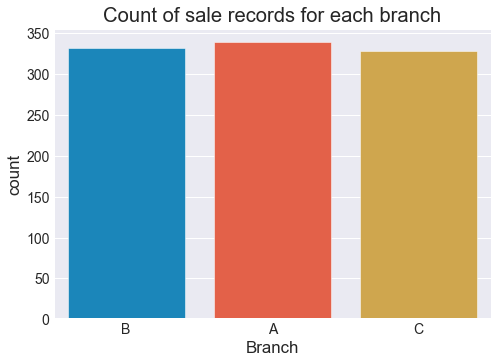

In [65]:
# count of records for each branch
plt.rcParams["figure.figsize"] = (7,5)
sns.set_style("darkgrid")
sns.countplot(x= "Branch", data= df1).set_title("Count of sale records for each branch")
plt.show()

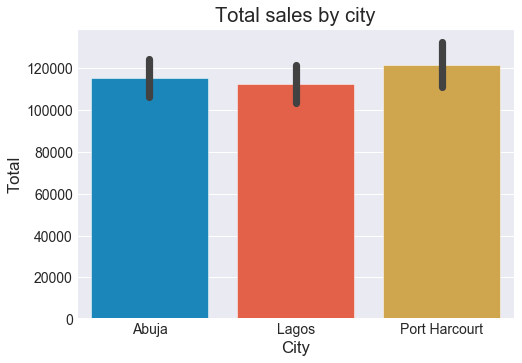

In [66]:
# Gross income by city
plt.rcParams["figure.figsize"] = (7,5)
sns.barplot(x= "City", y= "Total", data= df1).set_title("Total sales by city")
sns.set_palette("husl")
plt.show()

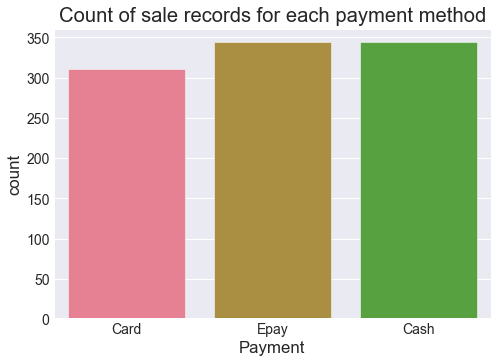

In [67]:
# count of each payment method:
sns.countplot(x= "Payment", data= df1).set_title("Count of sale records for each payment method")
sns.set_palette("husl")
plt.show()

### Answer to question 2: 
**Branch A (Lagos) had the highest number of sales records.
<br>The most frequently used payment method was epay.
<br>The city of Port Harcourt has the highest total income (sales)**

### Question 3: Determine the highest and lowest sold product line

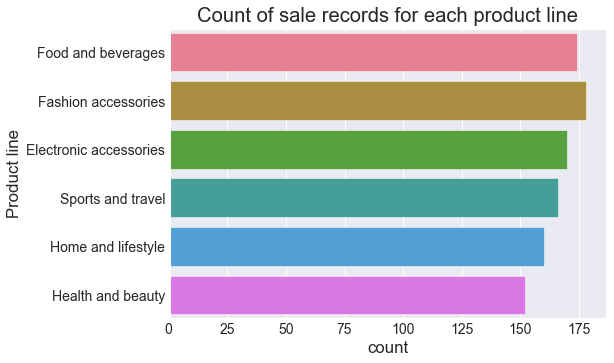

In [68]:
# count of each product line
sns.countplot(y= "Product line", data= df1).set_title("Count of sale records for each product line")
plt.show()

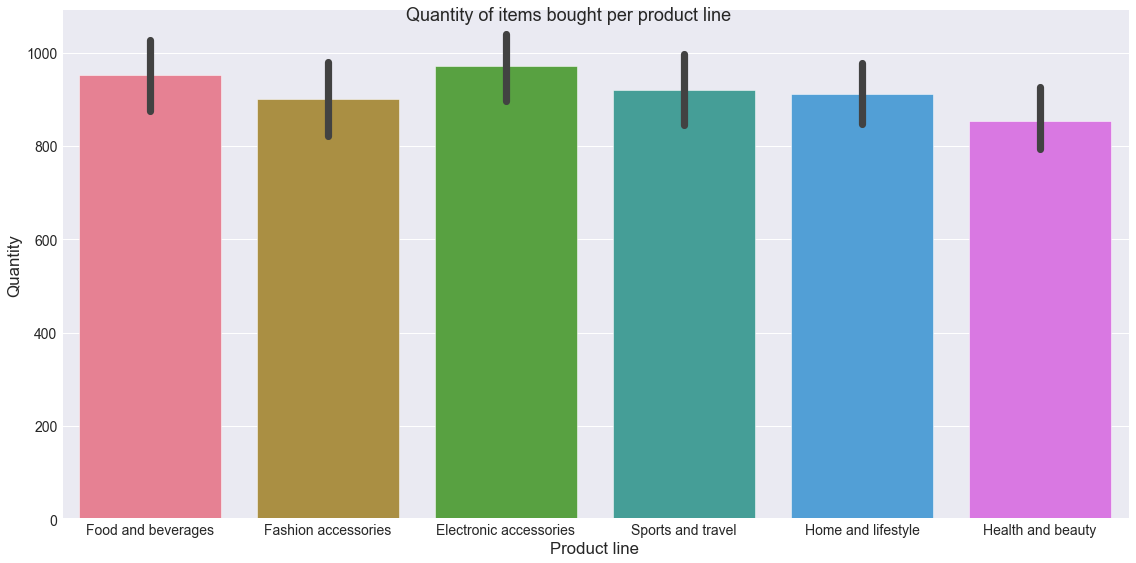

In [69]:
plot = sns.catplot(x="Product line", y="Quantity",data=df1, aspect=2,height=8, kind="bar", estimator= np.sum)
plot.fig.suptitle("Quantity of items bought per product line",
                  fontsize=18, fontdict={"weight": "bold"})
plt.show(plot)

### Answer to question 3: 
**The Fashion accessories line has the highest number of sales records, while the Health and beauty line recorded the lowest number of sales records**

### Question 4: Determine the preferred payment channel for each product line

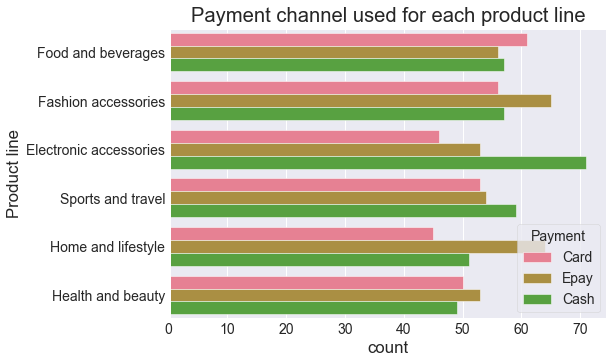

In [70]:
sns.countplot(y= "Product line", hue="Payment",data= df1).set_title("Payment channel used for each product line")
plt.show()

### Answer to question 4: 
**The preferred payment channel for each product line is listed below:
<br>Food and beverages - Card
<br>Fashion accessories - Epay
<br>Electronic accessories - Cash
<br>Sports and travel: Cash
<br>Home and lifestyle - Epay
<br>Health and beauty - Epay**

### Question 5: Determine the preferred payment channel for each branch

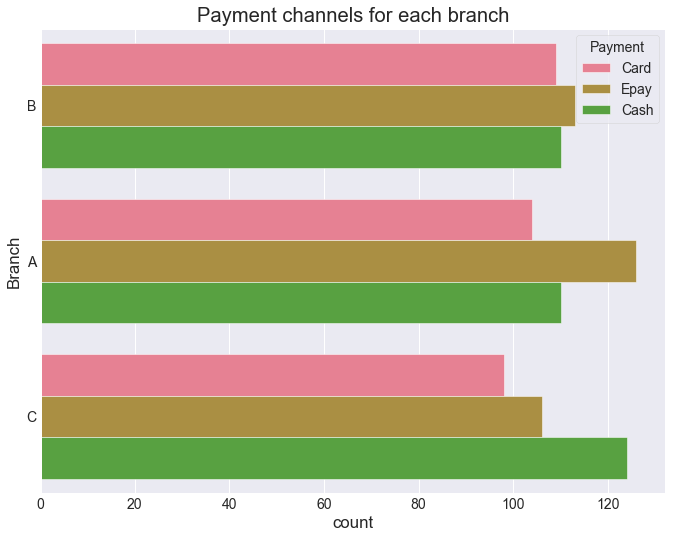

In [71]:
plt.rcParams["figure.figsize"] = (10,8)
sns.set_palette("husl")
sns.countplot(y= "Branch", hue="Payment",data= df1).set_title("Payment channels for each branch")
plt.show()

### Answer to question 5:
**Epay is the preferred form of payment in Branches A and B (Lagos and Abuja respectively).<br>Cash is the preferred form of payment in Branch C (Port Harcourt)**

### Question 6: Determine the branch with the lowest rating

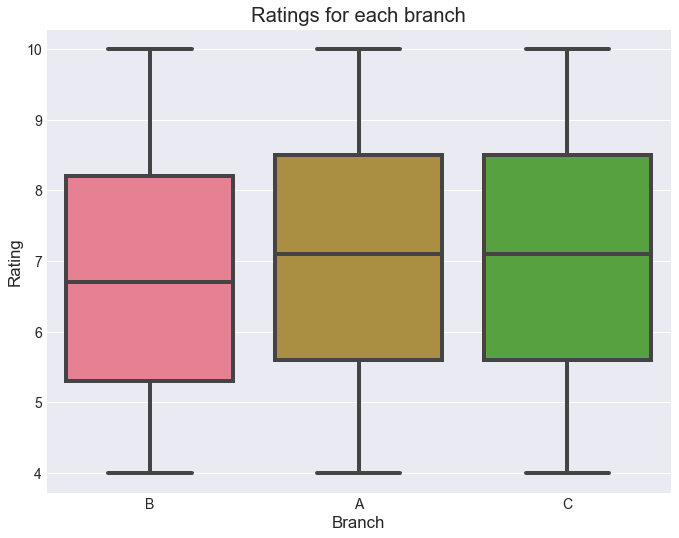

In [72]:
sns.boxplot(x="Branch", y= "Rating", data=df1).set_title("Ratings for each branch")
plt.show()

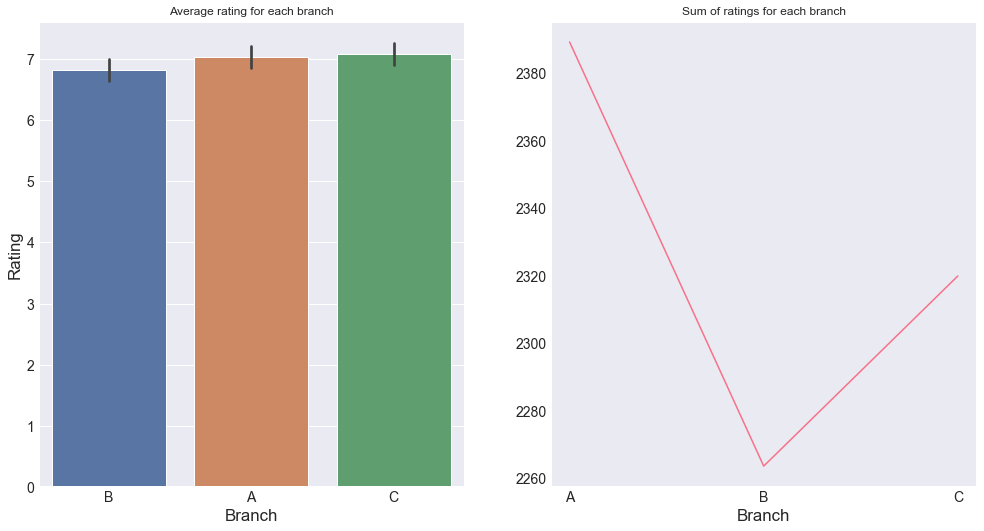

In [73]:
plt.rcParams["figure.figsize"] = (15,8)
fig, axes = plt.subplots(1,2)
sns.set(style="white")
sns.barplot(x="Branch", y="Rating", data=df1, ax=axes[0]).set_title("Average rating for each branch")
branch_sum_rating = df1.groupby("Branch")["Rating"].sum().plot(ax=axes[1]).set_title("Sum of ratings for each branch")
plt.show()

### Answer to question 6:
**From the plots above, it is visible that Branch B (Abuja) had the lowest ratings.**

### Question 7: Describe the relationship between gender and the kind of products being purchased at the supermarket

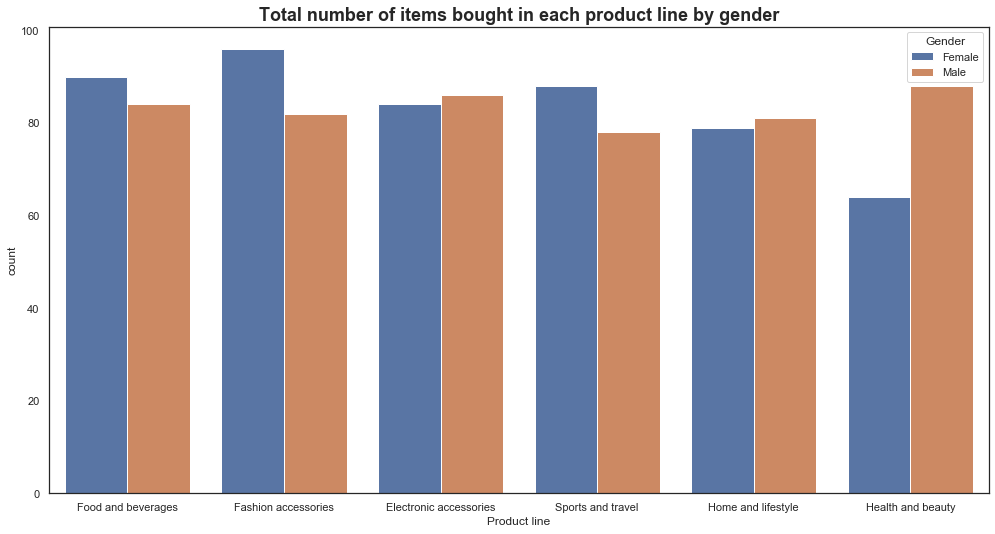

In [74]:
plot = sns.countplot(x="Product line", hue="Gender", data=df1).set_title(
    "Total number of items bought in each product line by gender",fontsize=18, fontdict={"weight": "bold"})
plt.show(plot)

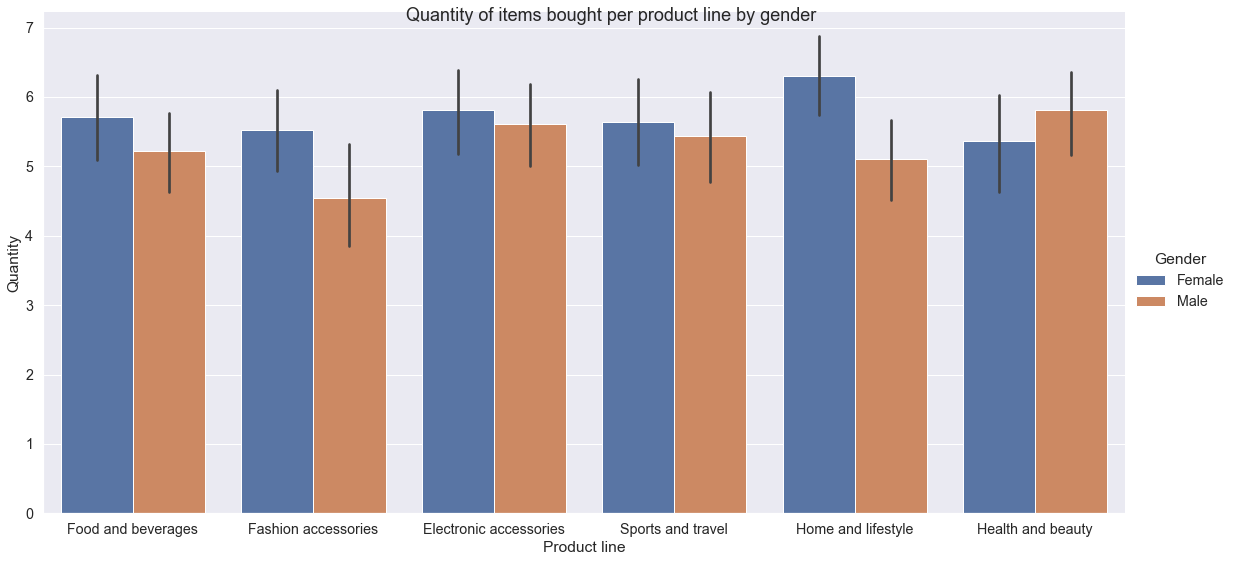

In [75]:
sns.set(font_scale=1.3)
plot = sns.catplot(x="Product line", y="Quantity", hue="Gender", data=df1, aspect=2,height=8, kind="bar")
plot.fig.suptitle("Quantity of items bought per product line by gender",
                  fontsize=18, fontdict={"weight": "bold"})
#plot.set_xticklabels(rotation=40, ha="right")
plt.show(plot)

### Answer to question 7:
#### From the count plot and cat plot above, it can be observed that:
<br> **1) More females patronized the Food and Beverages section than males.
<br>Females on average also bought a larger quantity of food and beverages than males.
<br> 2) Most buyers of fashion accessories were females.
<br>Females also bought more fashion accessories per time than males.
<br> 3) A majority of the customers who bought electronic accessories were male. Females however, usually bought a higher number of electronic accessories per time than males.
<br> 4) More females patronized the sports and travel section of the supermarket and generally bought more items in that section than males did.
<br> 5) Most customers in the Home and lifestyle section were male, but females made more purchases in that section.
<br> 6) The Health and Beauty section was mostly patronized by males who also bought a majority of the items sold there.**

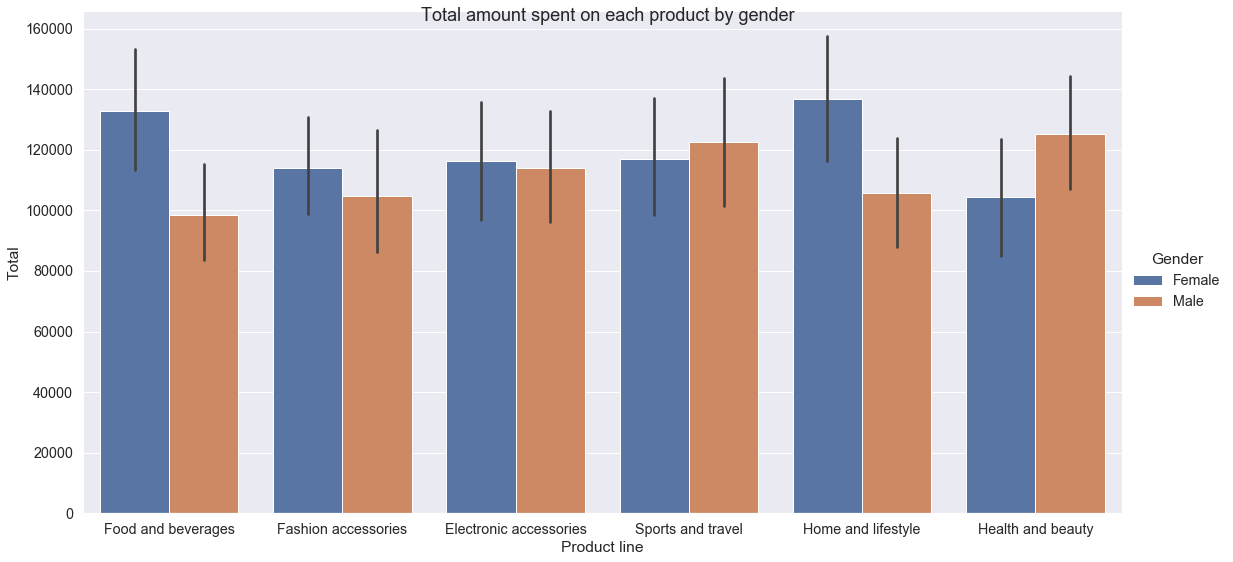

In [76]:
plot = sns.catplot(x="Product line", y="Total", hue="Gender", data=df1,aspect=2, kind="bar", height=8)
plot.fig.suptitle("Total amount spent on each product by gender",fontsize=18, 
                  fontdict={"weight": "bold"})
plt.show(plot)

### Answer to question 7:
<br>**1) Females contributed more to the total sales recorded in the Food and Beverages, Fashion accessories, Electronic accessories, and Home and lifestyle sections.
<br>2) Males contributed more to the total sales in the Sports and travel, and Health and beauty sections.**


### Question 8: Explore the interaction between the unit price of items and the quantity purchased

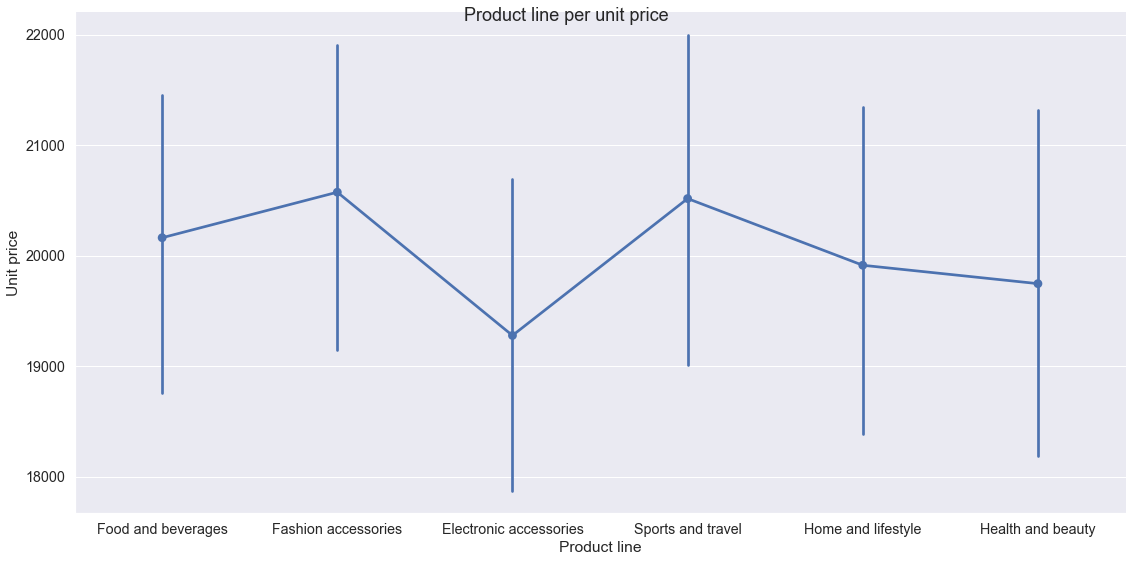

In [77]:
plot = sns.catplot(x="Product line", y="Unit price", data=df1,aspect=2, kind="point", height=8)
plot.fig.suptitle("Product line per unit price",fontsize=18, 
                  fontdict={"weight": "bold"})
plt.show(plot)

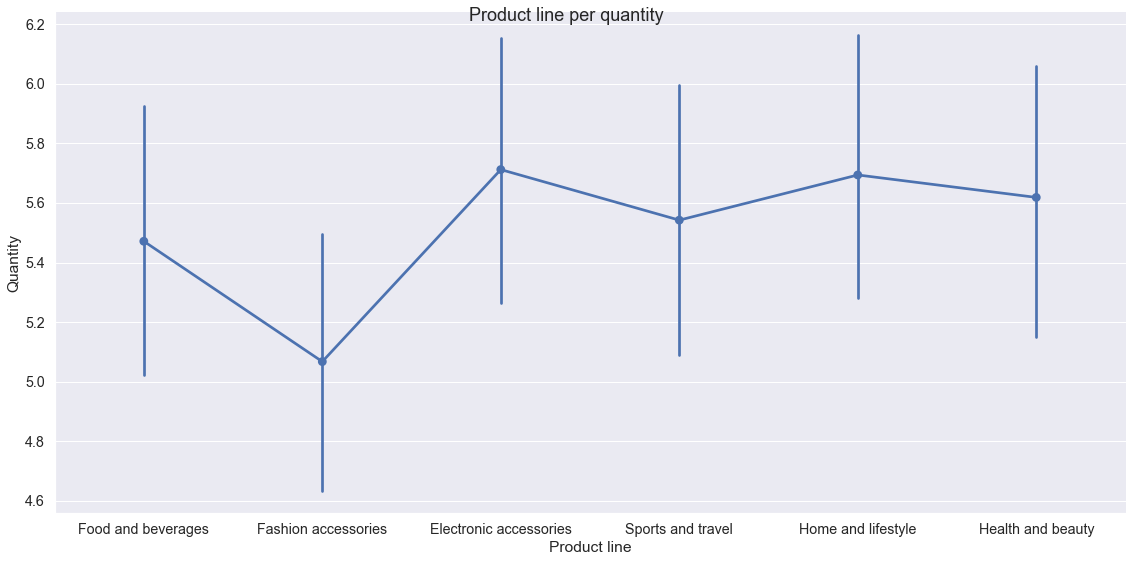

In [78]:
plot = sns.catplot(x="Product line", y="Quantity",data=df1,aspect=2, kind="point", height=8)
plot.fig.suptitle("Product line per quantity",fontsize=18, 
                  fontdict={"weight": "bold"})
plt.show(plot)

### Answer to question 8:
**1) Fashion accessories cost the highest and were sold in the lowest quantity.
<br>2) Electronic accessories cost the lowest and were sold in the highest quantity.
<br>3) The quantity of a product bought generally decreased with an increase in its price.**

## Standout Section:

### Day of the week with the highest income generated

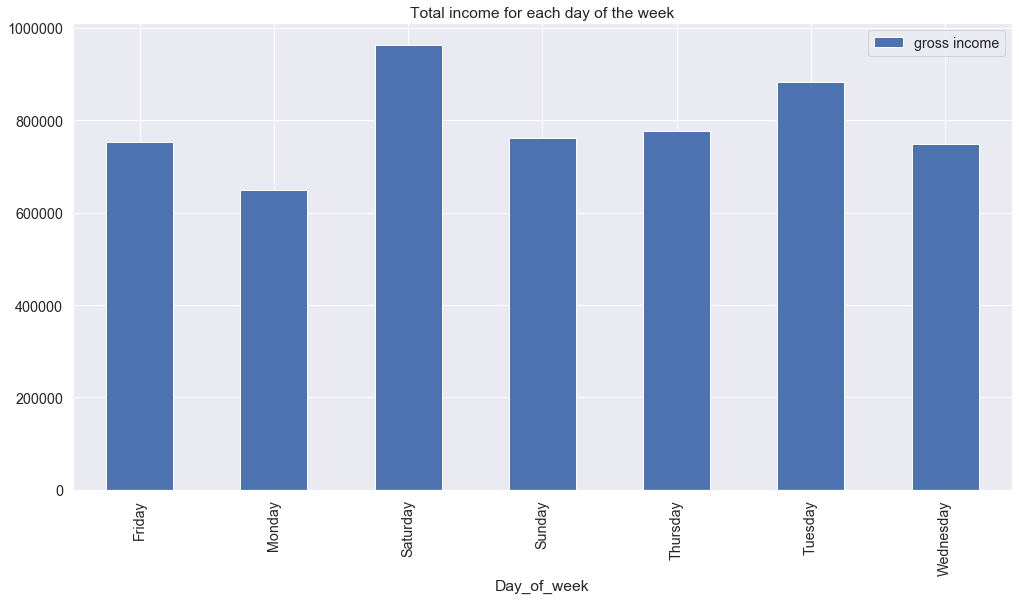

In [79]:
day_income = df1.groupby("Day_of_week").agg({"gross income":"sum"})
day_income.plot(kind="bar", title="Total income for each day of the week")
plt.show()

**More income was generated on Saturdays than on any other day of the week**

## Day of the week with the highest number of items sold

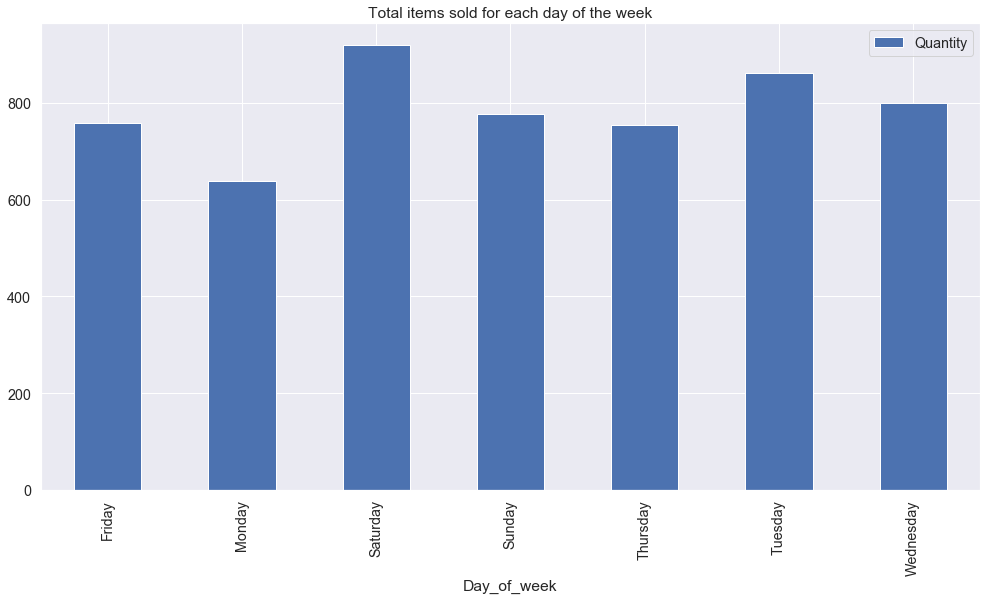

In [80]:
day_quantity = df1.groupby("Day_of_week").agg({"Quantity":"sum"})
day_quantity.plot(kind="bar", title="Total items sold for each day of the week")
plt.show()

**More items were sold on Saturdays than on any other day of the week**

### Plot of total sales against customer type

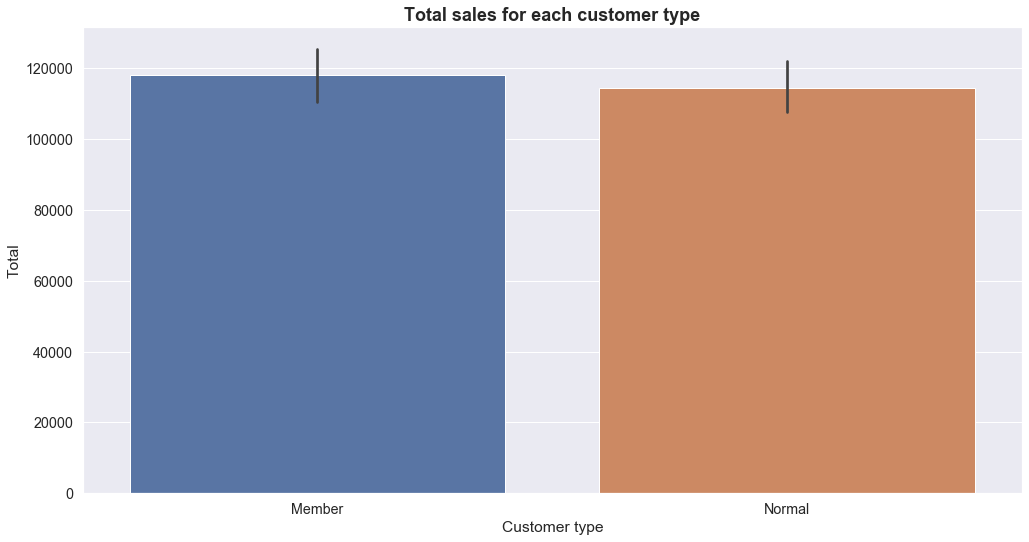

In [81]:
sns.barplot(x="Customer type", y="Total", data=df1).set_title(
    "Total sales for each customer type",fontsize=18, fontdict={"weight": "bold"})
plt.show()

**More sales were generated from the member customers than the normal customers**

### Plot of average unit price against product line

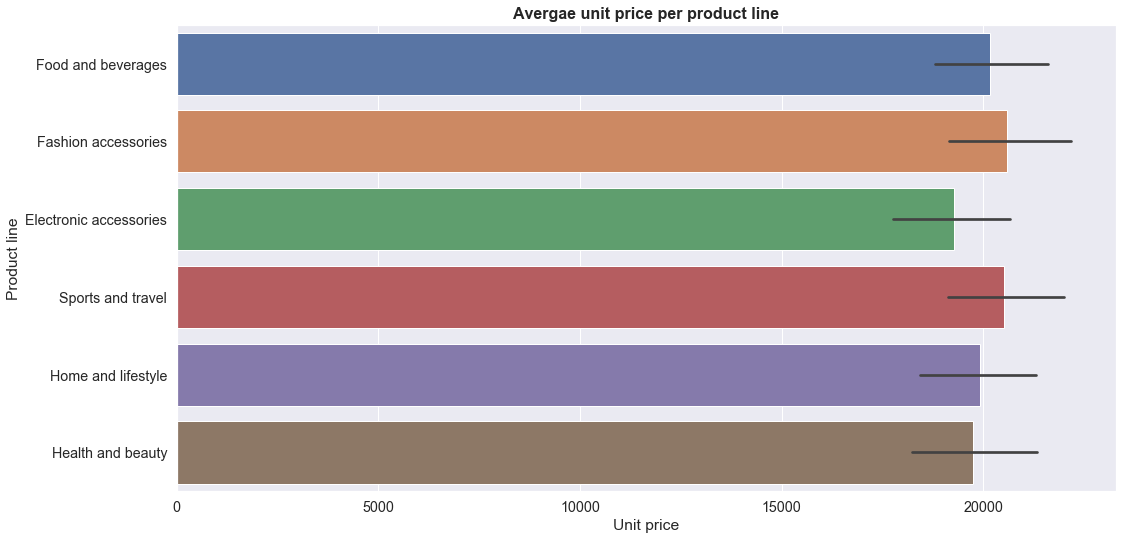

In [82]:
sns.barplot(y="Product line", x="Unit price", data=df1, orient="h", estimator=np.mean).set_title(
    "Avergae unit price per product line",fontsize=16, fontdict={"weight": "bold"})
plt.show()

**Electronic accessories averagely cost the least, and fashion accessories were averagely the most expensive items**

### Plot of Time in hours against gross income

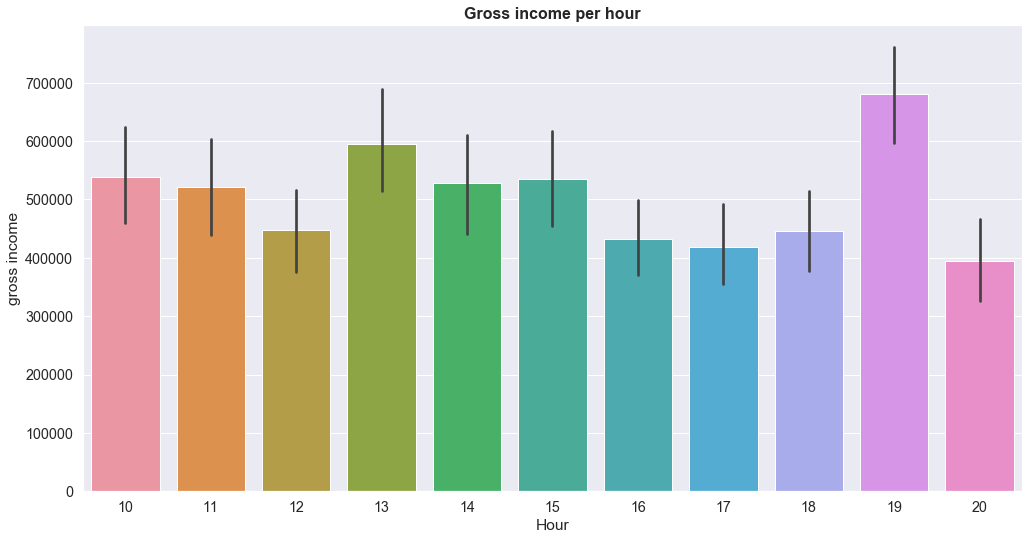

In [83]:
sns.barplot(x="Hour", y="gross income", data=df1, orient="v", estimator=np.sum).set_title(
    "Gross income per hour",fontsize=16, fontdict={"weight": "bold"})
plt.show()

**Maximum profit at the XYZ supermarket was made between 7pm and 8pm**

### Plot of total sales against ratings

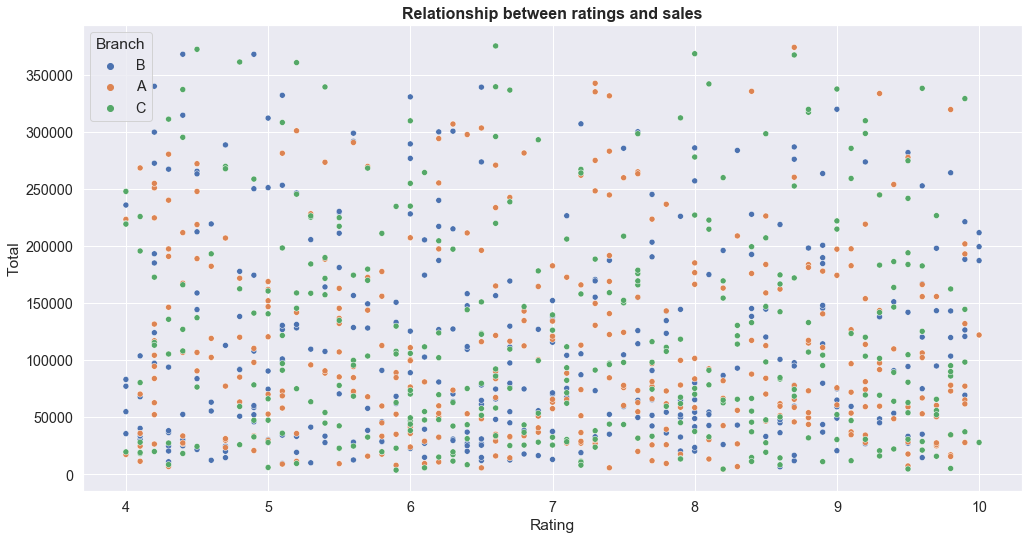

In [84]:
sns.scatterplot(x="Rating", y="Total",hue="Branch", data=df1, palette="deep").set_title(
    "Relationship between ratings and sales",fontsize=16, fontdict={"weight": "bold"})
plt.show()

**There is no relationship between the ratings given by customers and the total sales**

### Plot of ratings against the quantity of items bought

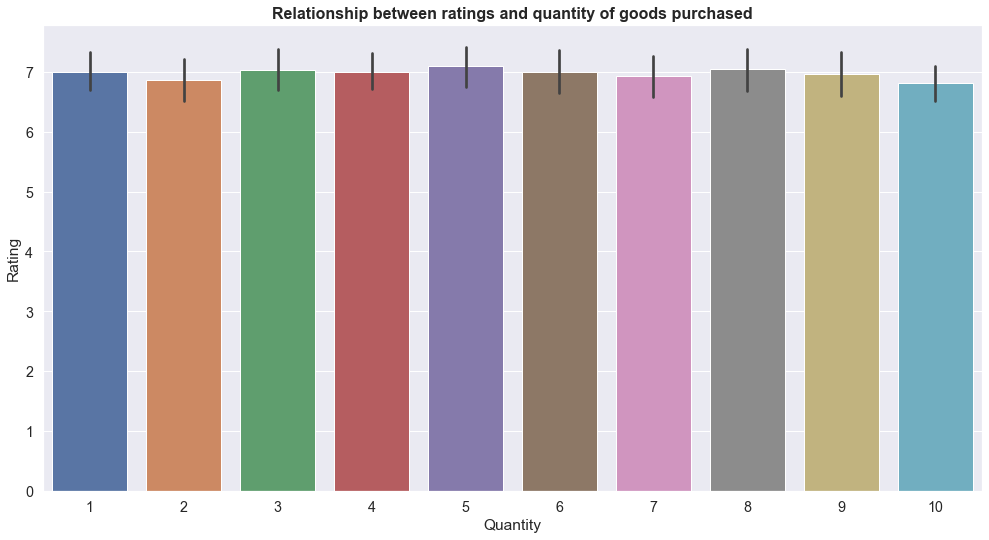

In [85]:
sns.barplot(x="Quantity", y="Rating", data=df1).set_title(
    "Relationship between ratings and quantity of goods purchased",fontsize=16, fontdict={"weight": "bold"})
plt.show()

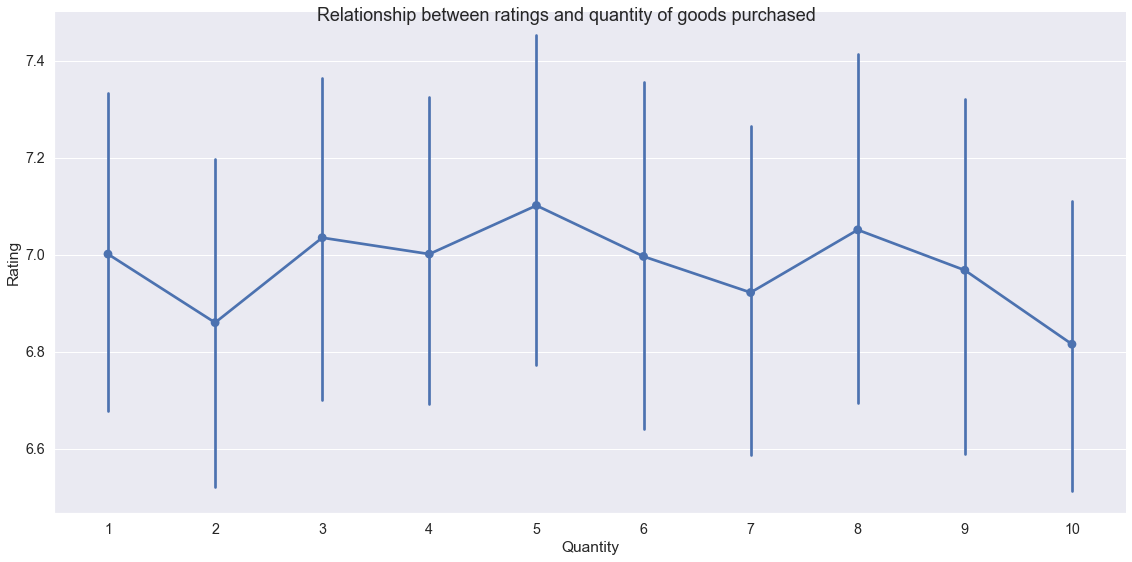

In [86]:
plot = sns.catplot(x="Quantity", y="Rating",data=df1,aspect=2, kind="point", height=8)
plot.fig.suptitle("Relationship between ratings and quantity of goods purchased",fontsize=18, 
                  fontdict={"weight": "bold"})
plt.show(plot)

**High ratings do not correspond to an increase in the number of items bought by customers**

### Determining the product line with the highest ratings

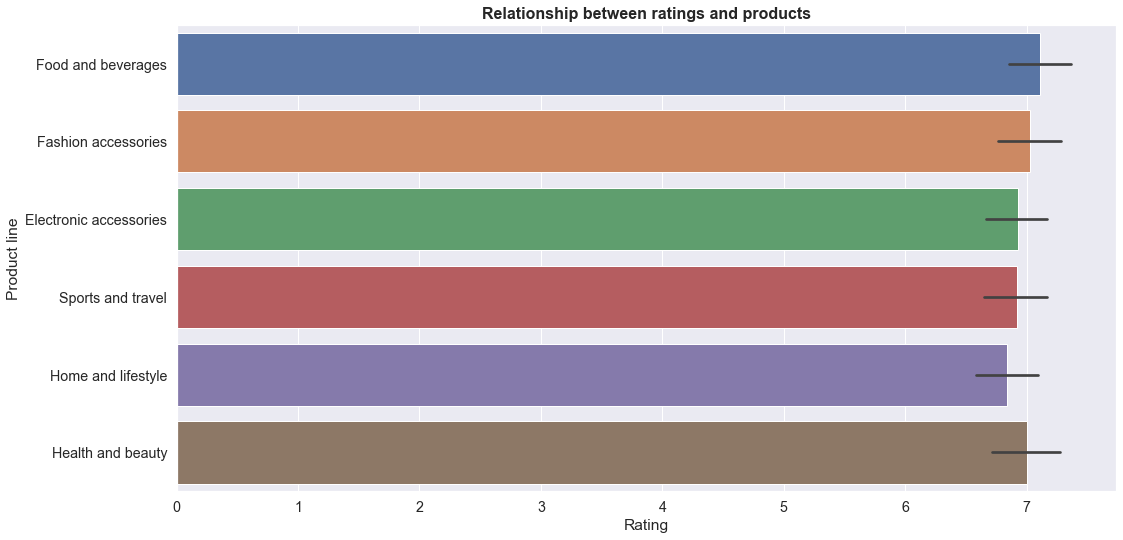

In [87]:
sns.barplot(x="Rating", y="Product line", orient="h", data=df1).set_title(
    "Relationship between ratings and products",fontsize=16, fontdict={"weight": "bold"})
plt.show()

**The food and beverages section had the highest ratings**

### Determining the relationship between the month of the year and the sale of each product.

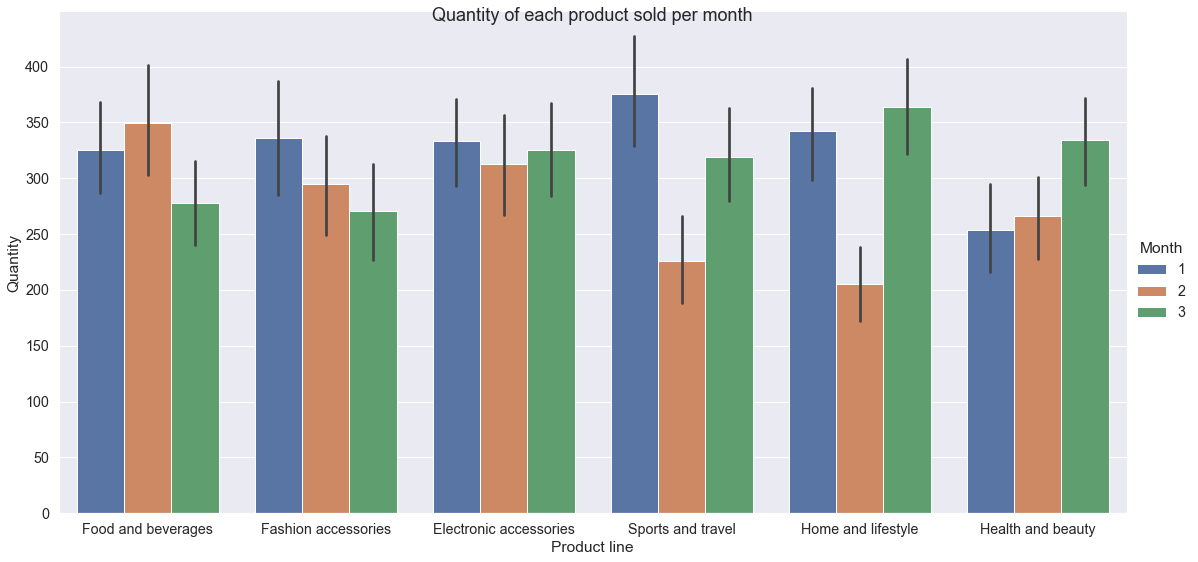

In [88]:
plot = sns.catplot(x="Product line", y="Quantity", hue="Month", data=df1,aspect=2,
                   kind="bar", height=8, estimator=np.sum)
plot.fig.suptitle("Quantity of each product sold per month",fontsize=18, 
                  fontdict={"weight": "bold"})
plt.show()

**1) Food and beverages were sold more in February.
<br>2) Fashion accessories, electronic accessories, and sports and travel items were sold more in January.
<br>3) Home and lifestyle, and health and beauty items were sold more in March.**

### Determining the relationship between the day of the week and sales in each product line:

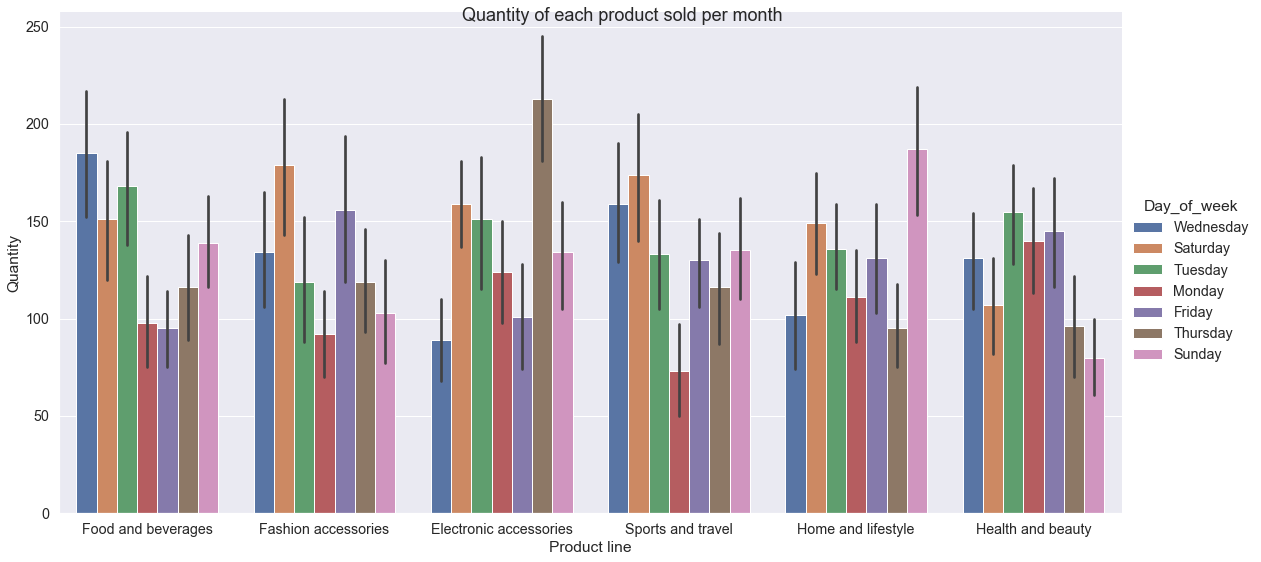

In [89]:
plot = sns.catplot(x="Product line", y="Quantity", hue="Day_of_week", data=df1,aspect=2,
                   kind="bar", height=8, estimator=np.sum)
plot.fig.suptitle("Quantity of each product sold per month",fontsize=18, 
                  fontdict={"weight": "bold"})
plt.show()

**1) More Foods and beverages were sold on Wednesdays.<br>2) More fashion accessories were sold on Saturdays.
<br>3) Electronic accessories were mostly sold on Thursdays.
<br>4) Sports and travel items were mostly sold on Saturdays.
<br>5) Home and lifestyle products were mostly sold on Sundays.
<br>6) Health and beauty items were mostly sold on Tuesdays.**